## K-means

### First example

In [38]:
#Let's import some useful packages

import numpy as np #numpy is pretty famous for array manipulations in python
import pandas as pd #pandas allows easy data management
from matplotlib import pyplot as plt 
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs #sklearn allows for statistical computations
from sklearn.cluster import KMeans #this is the boss!!!

In this example we will generate for simplicity our own sample using `make_blobs`. The `centers` parameter sepcifies the number of clusters; `n_samples` the training sample points; `cluster_std` is the variability(dispersion) of data in clusters; `random_state` iss set to 0 for reproducibility. 

In [35]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df=pd.DataFrame(data=X,columns=['X1','X2']) 
df['y'] = y
df

,X1,X2,y
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1
...,...,...,...
295,1.973698,1.579798,1
296,2.518342,1.391766,1
297,0.438990,4.535929,0
298,0.369479,7.791105,3


$X$ will be a (300,2) vector of controls. $y$ will be a categorical variable encoding the group. We are hence in $\mathbb{R}^2$. Let's have a look at the data:

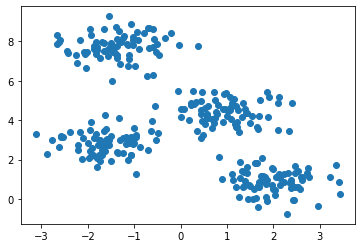

In [19]:
plt.scatter(X[:,0], X[:,1])

Even though we already know the optimal number of clusters (simple in this example), we could still benefit from determining it using the **elbow method**. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the `inertia_` property (representing WCSS, defined below) every time. \
$$WCSS=\sum_{i=1}^{m}(x_i-c_i)^2$$ where $x_i$ is each member of the cluster and $c_i$ its centroid. WCSS stands for Within Cluster Sum of Squares.

For n_clusters = 2, silhouette score is 0.5545480057127878)
For n_clusters = 3, silhouette score is 0.5780795631315686)
For n_clusters = 4, silhouette score is 0.7272834050460628)
For n_clusters = 5, silhouette score is 0.6256338628600293)
For n_clusters = 6, silhouette score is 0.5175246040233932)
For n_clusters = 7, silhouette score is 0.41286757238285704)
For n_clusters = 8, silhouette score is 0.3294124579128736)
For n_clusters = 9, silhouette score is 0.3274642607242082)
For n_clusters = 10, silhouette score is 0.3503885807880846)


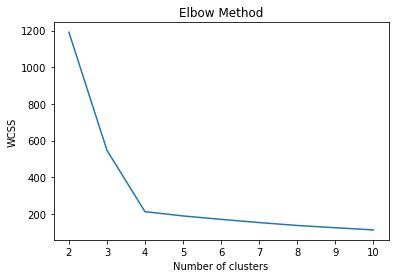

In [64]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X) #sometimes fit_transform to standardise X data.
    wcss.append(kmeans.inertia_)
    preds = kmeans.fit_predict(X,y)
    labels = kmeans.labels_
    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))

#Silhouette refers to a method of interpretation and validation of consistency within clusters 
#of data. The technique provides a succinct graphical representation of how well each object has been classified.
#The silhouette value is a measure of how similar an object is to its own cluster 
#(cohesion) compared to how it is similar to other clusters (separation). 
#**The silhouette ranges from −1 to +1, where a high value indicates that the object 
#is well matched to its own cluster and poorly matched to neighboring clusters**

#SO WE WANT THE CLUSTER WITH MAXIMUM SILHOUETTE
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#k-means displays high silhouette and low variance for 4 clusters;

What does `KMeans` command above do?\
`n_clusters` = # of clusters \
`init='k-means++'` = remember that k-means is NP-hard. Hence, we do not know in principle, how many iterations the k-means algorithm needs to converge. Moreover, k-means might converge to a point that is either a local minimum or not even a local minimum.\
Solution:

1. repeat the procedure several times with different randomly chosen initial centroids;

However, k-means might converge to suboptimal clusterings, and might perform more poorly than the original purpose of the objective function of minimizing the sum of squared distances of cluster points (see theory). This implies that `n_init` and `max_iter` should potentially be set to extremly high values if `init='k-means++'` is not set. Why?\
Example:


<img src="files/kmeans.png" width=400 height=100> <img src="files/kmeans2.png" width=400 height=100>

__Remember: $\textbf{K-Means algorihm} \neq \textbf{Minimization of objective}$. In principle the algorithm does not evaluate WCSS but it only__:
1. __initialize random centroids $\mu_i$;__ 
2. __evaluates the proximity of points to centroids and assign the points to cluster of nearest centroids;__
3. __computes the average $\mu_i=\frac{1}{|C_i|}\sum_{x \in C_i}x$ assigning new centroids__

__The algorithm repeats 1. and 2. until convergence. Step 3. will repeat equal to itself when the algorithm converges.__

Since width $w$ of rectangle (data are disposed as rectangle) is lower than height $h$, the clustering found by k-means in Fig.1 is sub-optimal! Step 3. of the algorithm would only computes the same new centroids, which coincide always wih the red points in Fig.1. The optimal one is depicted in Fig.2.\
Specifically: If k = 2 and the two initial cluster centers lie at the midpoints of the top and bottom line segments of the rectangle formed by the four data points, the k-means algorithm converges immediately, without moving these cluster centers. Consequently, the two bottom data points are clustered together and the two data points forming the top of the rectangle are clustered together—a suboptimal clustering because the width of the rectangle is greater than its height.\
Solution:

1. adopt _k-means++_ algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. It smartly chooses the initial centroids $\mu_i$ avoiding suboptimal solutions. Further details in  Arthur, D.; Vassilvitskii, S. (2007). "k-means++: the advantages of careful seeding"



Next, we’ll categorize the data using the optimum number of clusters (4) we determined in the elbow-rule step. `k-means++` ensures that you get don’t fall into the random initialization trap

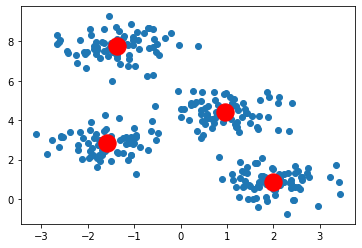

In [65]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

#kmeans.cluster_centers_[:, 0] are the x-coordinates of final centroids
#kmeans.cluster_centers_[:, 1] are the y-coordinates of final centroids

As an important side note: we build a `kmeans` object belonging to the class `KMeans`. This allows to obtain several interesting information using functions. Examples:

1. `kmeans.fit`
2. `kmeans.fit_predict`
3. `kmeans.fit_transform`
4. `kmeans.get_params`
5. `kmeans.inertia_`
6. `kmeans.precompute_distances`. If True : always precompute distances. Be careful: it takes a lot of memory. kMeans needs distances to the centroids ("means") of the clusters (at each iteration). `kmeans.precompute_distances` computes the pairwise distances between points which are not needed to kmeans. So having this data precomputed won't help. The meaning of the deprecated parameter here precompute_distances was whether to compute all the point-center distances first (to obtain a distance matrix, usefull for instance if we want to do spectral clustering, in that we already have the distance matrix pre-computed), or in-loop.
7. `kmeans.score`: important. It measures the performance of KMeans.
8. many others

### Spectral Clustering vs KMeans

Spectral clustering uses information from the eigenvalues (spectrum) of special matrices built from the graph or the data set. We’ll learn how to construct these matrices, interpret their spectrum, and use the eigenvectors to assign our data to clusters.


Quick recap: __Adjacency matrix (${\bf A}$)__ = matrix of 0 and 1. 0 if nodes $i$ and $j$ have no connection, 1 if $i$ and $j$ are connected. $(i,i)=0 \quad \forall i$ by construction. ${\bf A}$ is symmeric ($A_{i,j}=A_{j,i}$) for undirected graphs; __Degree matrix (${\bf D}$)__= the degree of a node is how many edges connect to it. The degree matrix is a diagonal matrix where the value at entry $(i, i)$ is the degree of node $i$. __Normal Laplacian matrix (${\bf L}$)__ = (${\bf A}$)-(${\bf D}$).\
The Laplacian’s diagonal is the degree of our nodes (since $A_{i,i}=0$ and $D_{i,i}\neq0$), and the off diagonal is the negative edge weights. This is the representation we are after for performing spectral clustering.

__Properties of ${\bf L}$__

<table><tr>
<td> <img src="sp_cl2.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="sp_cl1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="sp_cl3.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

We see that when the graph is (almost) completely disconnected, all ten of our eigenvalues are 0. As we add edges, some of our eigenvalues increase. In fact, __the number of 0 eigenvalues corresponds to the number of connected components (A set of nodes forms a connected component in an undirected graph if any node from the set of nodes can reach any other node by traversing edges. A single node is a connected component.) in our graph! (last step has one 0 component since the entire graph is connected!)__

Example: Fig.1: 7 connected components = 7 nodes + 1 connected component represented by nodes {0,1,2}; Fig.2 has 2 connected components... 


__The first nonzero eigenvalue is called the _spectral gap_. The spectral gap gives us some notion of the density of the graph. If this graph was densely connected (all pairs of the 10 nodes had an edge), then the spectral gap would be 10.__

The second eigenvalue is called the __Fiedler value__, and the corresponding vector is the Fiedler vector. The Fiedler value approximates the __minimum graph cut needed to separate the graph into _two_ connected components.__ Recall, that if our graph was already two connected components, then the Fiedler value would be 0 (because we would already have two connected components). Each value in the Fiedler vector gives us information about which side of the cut that node belongs (>0 to say cut 1; <0 to cut 2).



You may have noticed that the next two eigenvalues to the Fiedler are also pretty small. That tells us that we are “close” to having four separate connected components. In general, we often look for the __first large gap__ between eigenvalues in order to find the number of clusters expressed in our data. 

Having four eigenvalues before the gap indicates that there is likely four clusters. The vectors associated with the first three positive eigenvalues should give us information about which three cuts need to be made in the graph to assign each node to one of the four approximated components. In practice, we use k-means to classify the nodes based off their corresponding values in the eigenvector (i.e. sorted by eigenvector). Notice that KMeans is applied __once the number of clusters is determined through spectral clusering (4 clusters)__. Hence here KMEans serves only to separate points.

In [95]:
from sklearn.cluster import KMeans

A = np.array([
  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

# our adjacency matrix
print("Adjacency Matrix:")
print(A)

# Adjacency Matrix:
# [[0. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
#  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
#  [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
#  [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
#  [1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
#  [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
#  [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
#  [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
#  [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

# diagonal matrix
D = np.diag(A.sum(axis=1))

# graph laplacian
L = D-A

# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# kmeans on first three (from 1 to 4 excluded) vectors with nonzero eigenvalues
#N.B. SPECTRAL CLUSTERING SERVED ALSO IN DETERMINING THAT THE NUMBER OF OPTIMAL CLUSTERS IS 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(vecs[:,1:4]) #data are classified based on their eigenvectors

#specifically: 
#nodes 0,9 and 8 have all 3 values >=0;
#nodes 1,2 have 2 eigenvectors >=0;...

colors = kmeans.labels_

print("Clusters:", colors)

# Clusters: [2 1 1 0 0 0 3 3 2 2]

Adjacency Matrix:
[[0 1 1 0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0]]
Clusters: [0 0 0 1 1 1 2 2 3 3]


<img src="files/sp_cl6.png" width=400 height=100>

#### KMeans does not always work!

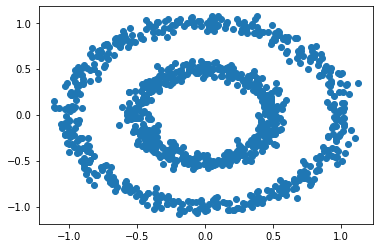

In [71]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np

#creating the data
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

When using k-means we end up with a bad clustering. Why? Say two initial centroids are chosen s.t. $\mu_1=(0.1,-0.5)$, $\mu_1=(-0.1,-0.48)$ as in fig. below (green big dots). Now, points that will be classified in red are more distant to $\mu_1$ than points in blue. Viceversa for $\mu_2$ (points in red closer to $\mu_2$ than are points in blue). Hence KMeans will interpret points in blue and points in red to belong to two distinct clusters!

This won't happen in Spectral Clustering where eigenvectors are employed. In spectral clustering, the affinity, and not the absolute location (i.e. k-means), determines what points fall under which cluster. The latter is particularly useful in tackling problems where the data forms complicated shapes.

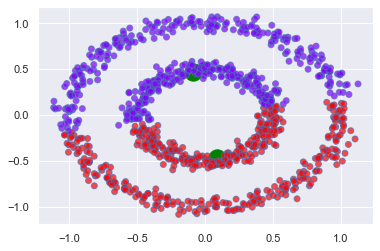

In [82]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X) #NOTICE: here Kmeans is NOT applied to eigenvectors as before but to data.
#while before kmeans serves only to visualize data, here is employed as a clustering method
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='green')
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

In contrast when using spectral clustering, the classification is correct:

/Users/federiconutarelli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


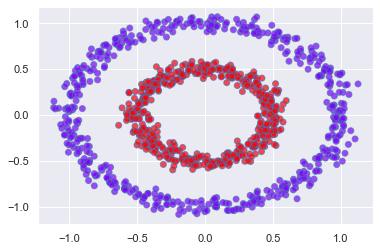

In [78]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()


sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)

#IMPORTANT:
#affinity=‘nearest_neighbors’: construct the affinity matrix by computing a graph of nearest neighbors
#affinity matrix measures how similar two points are. In our case "nearer points are similar".
#It is closely relaed to the Normalized Laplacian. Normalized Laplacian usally better for
#properties such as positive semidefiniteness.

sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')